# Leaf Classification main Notebook

### Dependencies

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from utils import COMPILE
from config import *

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Preparing the Data

In [2]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
# DATA_ORGANIZER(df=train_df,dir = IMAGES_DIR)

In [3]:
train_img = image_dataset_from_directory(directory=TRAIN_IMAGES_DIR,
                                         image_size=IMAGE_SIZE,
                                         color_mode="grayscale",
                                         validation_split=VALIDATION_SPLIT,
                                         subset="training",
                                         seed=SEED)

val_img = image_dataset_from_directory(directory=TRAIN_IMAGES_DIR,
                                         image_size=IMAGE_SIZE,
                                         color_mode="grayscale",
                                         validation_split=VALIDATION_SPLIT,
                                         subset="validation",
                                         seed=SEED)

Found 990 files belonging to 99 classes.
Using 792 files for training.
Found 990 files belonging to 99 classes.
Using 198 files for validation.


In [4]:
batch = train_img.as_numpy_iterator().next()
class_names = train_img.class_names

print(class_names)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

### Vizualizing the data

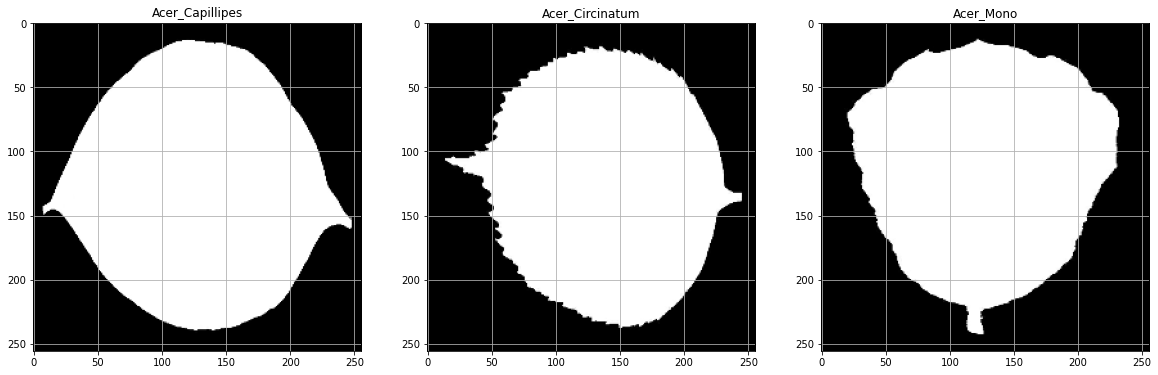

In [5]:
fig,ax = plt.subplots(ncols=3,figsize = (20,20))
for i,img in enumerate(batch[0][:3]):
    ax[i].imshow(img.astype(int),cmap = "gray")
    ax[i].title.set_text(class_names[i])
    ax[i].grid(True)

### Preprocessing the Data

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=ROTATION_RANGE,
    # horizontal_flip=HORIZONTAL_FLIP,
    validation_split=VALIDATION_SPLIT,
    fill_mode=FILMODE
)

preprocessed_train_img = train_datagen.flow_from_directory(
    directory=TRAIN_IMAGES_DIR,
    subset="training",
    shuffle=SHUFFLE_VALUE,
    seed=SEED,
    target_size=IMAGE_SIZE,
    color_mode= COLOR_MODE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE

)

preprocessed_val_img = train_datagen.flow_from_directory(
    directory=TRAIN_IMAGES_DIR,
    subset="validation",
    shuffle=SHUFFLE_VALUE,
    seed=SEED,
    target_size=IMAGE_SIZE,
    color_mode= COLOR_MODE,
    batch_size=VAL_BATCH_SIZE,
    class_mode=CLASS_MODE

)

Found 792 images belonging to 99 classes.
Found 198 images belonging to 99 classes.


### Training the neural network


In [13]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=INPUT_SHAPE))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(99,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 64)      640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 512)      

In [14]:
model.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(preprocessed_train_img,validation_data=preprocessed_val_img,
          batch_size=BATCH_SIZE,
          validation_batch_size=VAL_BATCH_SIZE,
          epochs=EPOCHS)

Epoch 1/50
50/50 [==============================] - 3s 56ms/step - loss: 0.0100 - accuracy: 0.0126 - val_loss: 0.0100 - val_accuracy: 0.0455
Epoch 2/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0100 - accuracy: 0.0290 - val_loss: 0.0099 - val_accuracy: 0.0707
Epoch 3/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0099 - accuracy: 0.0429 - val_loss: 0.0099 - val_accuracy: 0.0606
Epoch 4/50
50/50 [==============================] - 3s 54ms/step - loss: 0.0098 - accuracy: 0.0732 - val_loss: 0.0096 - val_accuracy: 0.1212
Epoch 5/50
21/50 [===========>..................] - ETA: 1s - loss: 0.0095 - accuracy: 0.1311

KeyboardInterrupt: 